In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('dengue_features_train.csv')
df_label = pd.read_csv('dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [4]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
sj_data = data[data['city'] == 'sj']


In [8]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [9]:
sj_data['ndvi_se'] = sj_data['ndvi_se'].fillna(method = 'ffill')
sj_data['ndvi_sw'] = sj_data['ndvi_sw'].fillna(method = 'ffill')
sj_data['ndvi_ne'] = sj_data['ndvi_ne'].fillna(method = 'ffill')
sj_data['ndvi_nw'] = sj_data['ndvi_nw'].fillna(method = 'ffill')

In [10]:
sj_data['reanalysis_air_temp_k'] = sj_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_avg_temp_k'] = sj_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_dew_point_temp_k'] =sj_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_max_air_temp_k'] = sj_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_min_air_temp_k'] = sj_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [11]:
sj_data['reanalysis_precip_amt_kg_per_m2'] = sj_data['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill')
sj_data['reanalysis_relative_humidity_percent'] = sj_data['reanalysis_relative_humidity_percent'].fillna(method='ffill')
sj_data['reanalysis_sat_precip_amt_mm'] = sj_data['reanalysis_sat_precip_amt_mm'].fillna(method='ffill')
sj_data['reanalysis_tdtr_k'] = sj_data['reanalysis_tdtr_k'].fillna(method='ffill')
sj_data['station_avg_temp_c'] = sj_data['station_avg_temp_c'].fillna(method='ffill')
sj_data['station_diur_temp_rng_c'] = sj_data['station_diur_temp_rng_c'].fillna(method='ffill')
sj_data['station_precip_mm'] = sj_data['station_precip_mm'].fillna(method='ffill')

In [12]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

In [13]:
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [14]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [15]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [16]:
sj_data = sj_data[['week_start_date','total_cases','avg_reanalysis', 'avg_ndvi']]

In [17]:
sj_data.head()

,week_start_date,total_cases,avg_reanalysis,avg_ndvi
0,1990-04-30,4,296.686000,0.150606
1,1990-05-07,5,297.581143,0.157479
2,1990-05-14,4,298.178857,0.133315
3,1990-05-21,3,298.385143,0.209286
4,1990-05-28,6,298.880857,0.239235


In [18]:
# !pip install Prophet

In [19]:
from prophet import Prophet

In [20]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   week_start_date  936 non-null    object 
 1   total_cases      936 non-null    int64  
 2   avg_reanalysis   936 non-null    float64
 3   avg_ndvi         936 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 36.6+ KB


In [21]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [22]:
# m = prophet.Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # future = m.make_future_dataframe(periods = 10)
# # forecast = m.predict(future)




In [23]:
test_df_main = pd.read_csv('dengue_features_test.csv')
test_df = test_df_main[test_df_main['city']=='sj']
test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [24]:
test_df['ndvi_se'] = test_df['ndvi_se'].fillna(method = 'ffill')
test_df['ndvi_sw'] = test_df['ndvi_sw'].fillna(method = 'ffill')
test_df['ndvi_ne'] = test_df['ndvi_ne'].fillna(method = 'ffill')
test_df['ndvi_nw'] = test_df['ndvi_nw'].fillna(method = 'ffill')

test_df['reanalysis_air_temp_k'] = test_df['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_avg_temp_k'] = test_df['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_dew_point_temp_k'] =test_df['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_max_air_temp_k'] = test_df['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_min_air_temp_k'] = test_df['reanalysis_min_air_temp_k'].fillna(method = 'ffill')




test_df['avg_reanalysis'] = test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df['avg_ndvi'] = test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [25]:
test_df = test_df[['week_start_date','avg_reanalysis', 'avg_ndvi']]

In [27]:
# test_df['reanalysis_relative_humidity_percent'] = test_df['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')


In [28]:
test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df.head()


,ds,avg_reanalysis,avg_ndvi
0,2008-04-29,297.814000,0.039032
1,2008-05-06,297.785714,0.030989
2,2008-05-13,298.544286,0.057178
3,2008-05-20,298.744286,0.057162
4,2008-05-27,298.762286,0.058704


In [29]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.fit(sj_data)

18:45:45 - cmdstanpy - INFO - Chain [1] start processing
18:45:45 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
18:45:58 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:45:59 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] start processing
18:46:00 - cmdstanpy - INFO - Chain [1] done processing
18:46:00 - cmdstanpy - INFO - Chain [1] done processing
18:46:01 - cmdstanpy - INFO - Chain [1] done processing
18:46:01 - cmdstanpy - INFO - Chain [1] done processing
18:46:02 - cmdstanpy - INFO - Chain [1] done processing
18:46:02 - cmdstanpy - INFO - Chain [1] done pr

18:46:18 - cmdstanpy - INFO - Chain [1] start processing
18:46:18 - cmdstanpy - INFO - Chain [1] done processing
18:46:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:18 - cmdstanpy - INFO - Chain [1] start processing
18:46:19 - cmdstanpy - INFO - Chain [1] start processing
18:46:19 - cmdstanpy - INFO - Chain [1] start processing
18:46:19 - cmdstanpy - INFO - Chain [1] start processing
18:46:19 - cmdstanpy - INFO - Chain [1] done processing
18:46:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:19 - cmdstanpy - INFO - Chain [1] done processing
18:46:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:19 - cmdstanpy - INFO - Chain [1] done processing
18:46:19 - cmdstanpy - INFO -

18:46:34 - cmdstanpy - INFO - Chain [1] start processing
18:46:34 - cmdstanpy - INFO - Chain [1] done processing
18:46:35 - cmdstanpy - INFO - Chain [1] start processing
18:46:35 - cmdstanpy - INFO - Chain [1] done processing
18:46:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:35 - cmdstanpy - INFO - Chain [1] start processing
18:46:35 - cmdstanpy - INFO - Chain [1] done processing
18:46:35 - cmdstanpy - INFO - Chain [1] start processing
18:46:36 - cmdstanpy - INFO - Chain [1] done processing
18:46:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:46:36 - cmdstanpy - INFO - Chain [1] start processing
18:46:36 - cmdstanpy - INFO - Chain [1] done processing
18:46:37 - cmdstanpy - INFO - Chain [1] start processing
18:46:37 - cmdstanpy - INFO - Chain [1] done processing
18:46:37 - cmd

18:46:57 - cmdstanpy - INFO - Chain [1] start processing
18:46:58 - cmdstanpy - INFO - Chain [1] start processing
18:46:58 - cmdstanpy - INFO - Chain [1] start processing
18:46:58 - cmdstanpy - INFO - Chain [1] done processing
18:46:58 - cmdstanpy - INFO - Chain [1] done processing
18:46:59 - cmdstanpy - INFO - Chain [1] start processing
18:46:59 - cmdstanpy - INFO - Chain [1] done processing
18:46:59 - cmdstanpy - INFO - Chain [1] start processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
18:47:00 - cmdstanpy - INFO - Chain [1] start processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
18:47:01 - cmdstanpy - INFO - Chain [1] start processing
18:47:01 - cmdstanpy - INFO - Chain [1] done processing
18:47:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:47:01 - cmdstanpy - INFO - Chain [1] start processin

18:47:16 - cmdstanpy - INFO - Chain [1] start processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] start processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:16 - cmdstanpy - INFO - Chain [1] done processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] done processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] done processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:17 - cmdstanpy - INFO - Chain [1] done processing
18:47:17 - cmdstanpy - INFO - Chain [1] start processing
18:47:18 - cmdstanpy - INFO - Chain [1] 

18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:06 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] start processing
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:07 - cmdstanpy - INFO - Chain [1] done processing
18:48:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale

18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:16 - cmdstanpy - INFO - Chain [1] done processing
18:48:16 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:17 - cmdstanpy - INFO - Chain [1] start processing
18:48:17 - cmdstanpy - INFO - Chain [1] done processing
18:48:17 - cmds

18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:25 - cmdstanpy - INFO - Chain [1] start processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:25 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - INFO - Chain [1] start processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - INFO - Chain [1] start processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdstanpy - INFO - Chain [1] done processing
18:48:26 - cmdst

18:48:40 - cmdstanpy - INFO - Chain [1] start processing
18:48:40 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] done processing
18:48:41 - cmdstanpy - INFO - Chain [1] start processing
18:48:42 - cmdstanpy - INFO - Chain [1] done processing
18:48:42 - cmdstanpy - INFO - Chain [1] start processing
18:48:42 - cmdstanpy - INFO - Chain [1] start processing
18:48:42 - cmdstanpy - INFO - Chain [1] done processing
18:48:42 - cmdstanpy - INFO - Chain [1] done processing
18:48:42 - cmdstanpy - INFO - Chain [1] 

18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:55 - cmdstanpy - INFO - Chain [1] start processing
18:48:55 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:56 - cmdstanpy - INFO - Chain [1] done processing
18:48:56 - cmdstanpy - INFO - Chain [1] start processing
18:48:57 - cmdstanpy - INFO - Chain [1] done processing
18:48:57 - cmdstanpy - INFO - Chain [1] 

18:49:24 - cmdstanpy - INFO - Chain [1] done processing
18:49:24 - cmdstanpy - INFO - Chain [1] done processing
18:49:24 - cmdstanpy - INFO - Chain [1] start processing
18:49:24 - cmdstanpy - INFO - Chain [1] done processing
18:49:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:24 - cmdstanpy - INFO - Chain [1] start processing
18:49:25 - cmdstanpy - INFO - Chain [1] start processing
18:49:25 - cmdstanpy - INFO - Chain [1] done processing
18:49:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:25 - cmdstanpy - INFO - Chain [1] start processing
18:49:25 - cmdstanpy - INFO - Chain [1] done processing
18:49:25 - cmdstanpy - INFO - Chain [1] done processing
18:49:25 - cmdstanpy - INFO - Chain [1] done processing
18:49:26 - cmdstanpy - INFO - Chain [1] start processing
18:49:26 - cmds

18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] start processing
18:49:35 - cmdstanpy - INFO - Chain [1] done processing
18:49:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:49:35 - cmdstanpy - INFO -

18:49:45 - cmdstanpy - INFO - Chain [1] done processing
18:49:45 - cmdstanpy - INFO - Chain [1] start processing
18:49:45 - cmdstanpy - INFO - Chain [1] done processing
18:49:45 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:46 - cmdstanpy - INFO - Chain [1] start processing
18:49:46 - cmdstanpy - INFO - Chain [1] done processing
18:49:47 - cmdstanpy - INFO - Chain [1] start processing
18:49:47 - cmdstanpy - INFO - Chain [1] start processing
18:49:47 - cmdstanpy - INFO - Chain [1] done processing
18:49:47 - cmdstanpy - INFO - Chain [1] 

18:50:00 - cmdstanpy - INFO - Chain [1] done processing
18:50:00 - cmdstanpy - INFO - Chain [1] done processing
18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:01 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] 

18:50:24 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] start processing
18:50:25 - cmdstanpy - INFO - Chain [1] done processing
18:50:25 - cmdstanpy - INFO - Chain [1] done processing
18:50:26 - cmdstanpy - INFO - Chain [1] start processing
18:50:26 - cmdstanpy - INFO - Chain [1] start processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:29 - cmdstanpy - INFO - Chain [1] done processing
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:30 - cmdstanpy - INFO - Chain [1] start processing
18:50:31 - cmdstanpy - INFO - Chain [1] done processing
18:50:32 - cmdstanpy - INFO - Chain 

18:50:51 - cmdstanpy - INFO - Chain [1] done processing
18:50:51 - cmdstanpy - INFO - Chain [1] done processing
18:50:51 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] start processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:52 - cmdstanpy - INFO - Chain [1] done processing
18:50:53 - cmds

18:51:03 - cmdstanpy - INFO - Chain [1] start processing
18:51:03 - cmdstanpy - INFO - Chain [1] start processing
18:51:03 - cmdstanpy - INFO - Chain [1] done processing
18:51:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:03 - cmdstanpy - INFO - Chain [1] start processing
18:51:04 - cmdstanpy - INFO - Chain [1] done processing
18:51:04 - cmdstanpy - INFO - Chain [1] done processing
18:51:05 - cmdstanpy - INFO - Chain [1] done processing
18:51:05 - cmdstanpy - INFO - Chain [1] start processing
18:51:05 - cmdstanpy - INFO - Chain [1] done processing
18:51:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:05 - cmdstanpy - INFO - Chain [1] start processing
18:51:05 - cmdstanpy - INFO - Chain [1] done processing
18:51:05 - cmdstanpy - INFO - Chain [1] done processing
18:51:05 - cmds

18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
18:51:15 - cmdstanpy - INFO - Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
18:51:16 - cmdstanpy - INFO - Chain [1] start processing
18:51:16 - cmdstanpy - INFO - Chain [1] done processing
18:51:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:51:16 - cmdstanpy - INFO - Chain [1] start processing
18:51:16 - cmdstanpy - INFO - Chain [1] start processing
18:51:16 - cmdstanpy - INFO - Chain [1] done processing
18:51:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization term

18:51:28 - cmdstanpy - INFO - Chain [1] start processing
18:51:28 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:29 - cmdstanpy - INFO - Chain [1] start processing
18:51:29 - cmdstanpy - INFO - Chain [1] done processing
18:51:30 - cmdstanpy - INFO - Chain [1] start processing
18:51:30 - cmdstanpy - INFO - Chain [1]

18:52:09 - cmdstanpy - INFO - Chain [1] done processing
18:52:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO - Chain [1] done processing
18:52:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO - Chain [1] done processing
18:52:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO - Chain [1] start processing
18:52:09 - cmdstanpy - INFO 

18:52:16 - cmdstanpy - INFO - Chain [1] start processing
18:52:16 - cmdstanpy - INFO - Chain [1] done processing
18:52:16 - cmdstanpy - INFO - Chain [1] start processing
18:52:16 - cmdstanpy - INFO - Chain [1] done processing
18:52:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:17 - cmdstanpy - INFO - Chain [1] start processing
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmdstanpy - INFO - Chain [1] start processing
18:52:17 - cmdstanpy - INFO - Chain [1] start processing
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:17 - cmdstanpy - INFO - Chain [1] done processing
18:52:17 - cmds

18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmdstanpy - INFO - Chain [1] start processing
18:52:26 - cmdstanpy - INFO - Chain [1] done processing
18:52:26 - cmds

18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] done processing
18:52:39 - cmdstanpy - INFO - Chain [1] start processing
18:52:40 - cmdstanpy - INFO - Chain [1] done processing
18:52:40 - cmdstanpy - INFO - Chain [1] start processing
18:52:40 - cmdstanpy - INFO - Chain [1] done processing
18:52:40 - cmdstanpy - INFO - Chain [1] start processing
18:52:40 - cmdstanpy - INFO - Chain [1]

18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:54 - cmdstanpy - INFO - Chain [1] start processing
18:52:54 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] start processing
18:52:55 - cmdstanpy - INFO - Chain [1] done processing
18:52:55 - cmdstanpy - INFO - Chain [1]

18:53:27 - cmdstanpy - INFO - Chain [1] start processing
18:53:27 - cmdstanpy - INFO - Chain [1] done processing
18:53:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:53:27 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:53:28 - cmdstanpy - INFO - Chain [1] start processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:28 - cmdstanpy - INFO - Chain [1] done processing
18:53:29 - cmdstanpy - INFO - Chain [1] start processing
18:53:29 - cmdstanpy - INFO - Chain [1] start processing
18:53:29 - cmd

18:53:39 - cmdstanpy - INFO - Chain [1] start processing
18:53:39 - cmdstanpy - INFO - Chain [1] start processing
18:53:39 - cmdstanpy - INFO - Chain [1] done processing
18:53:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:53:39 - cmdstanpy - INFO - Chain [1] start processing
18:53:39 - cmdstanpy - INFO - Chain [1] done processing
18:53:40 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - INFO - Chain [1] start processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:53:41 - cmdstanpy - INFO - Chain [1] start processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmdstanpy - INFO - Chain [1] done processing
18:53:41 - cmds

18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:53:54 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing

18:54:06 - cmdstanpy - INFO - Chain [1] start processing
18:54:06 - cmdstanpy - INFO - Chain [1] done processing
18:54:06 - cmdstanpy - INFO - Chain [1] start processing
18:54:06 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:07 - cmdstanpy - INFO - Chain [1] done processing
18:54:07 - cmdstanpy - INFO - Chain [1] start processing
18:54:08 - cmdstanpy - INFO - Chain [1] done processing
18:54:08 - cmdstanpy - INFO - Chain [1] start processing
18:54:08 - cmdstanpy - INFO - Chain [1]

18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:22 - cmdstanpy - INFO - Chain [1] start processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:22 - cmdstanpy - INFO - Chain [1] done processing
18:54:23 - cmdstanpy - INFO - Chain [1] start processing
18:54:23 - cmdstanpy - INFO - Chain [1] start processing
18:54:23 - cmdstanpy - INFO - Chain [1] done processing
18:54:23 - cmdstanpy - INFO - Chain [1] done processing
18:54:23 - cmdstanpy - INFO - Chain [1] start processing
18:54:23 - cmdstanpy - INFO - Chain [1] done processing
18:54:29 - cmdstanpy - INFO - Chain [1] done processing
18:54:35 - cmdstanpy - INFO - Chain [1] start processing
18:54:35 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing in

18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:56 - cmdstanpy - INFO - Chain [1] done processing
18:54:56 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] done processing
18:54:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] done processing
18:54:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] start processing
18:54:57 - cmdstanpy - INFO - Chain [1] done processing
18:54:57 - cmdstanpy - ERROR - Chain [1] error: error during processing

18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:55:09 - cmdstanpy - INFO - Chain [1] done processing
18:55:09 - cmdstanpy - INFO - Chain [1] start processing
18:55:10 - cmdstanpy - INFO - Chain [1] start processing
18:55:10 - cmdstanpy - INFO - Chain [1] start processing
18:55:10 - cmdstanpy - INFO - Chain [1] done processing
18:55:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:55:25 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:25 - cmdstanpy - INFO - Chain [1] start processing
18:55:25 - cmdstanpy - INFO - Chain [1] done processing
18:55:26 - cmdstanpy - INFO - Chain [1] start processing
18:55:26 - cmdstanpy - INFO - Chain [1] start processing
18:55:26 - cmdstanpy - INFO - Chain [1] done processing
18:55:26 - cmdstanpy - INFO - Chain [1] done processing
18:55:27 - cmdstanpy - INFO - Chain [1] start processing
18:55:27 - cmdstanpy - INFO - Chain [1] done processing
18:55:27 - cmdstanpy - INFO - Chain [1] start processing
18:55:27 - cmdstanpy - INFO - Chain [1] done processing
18:55:28 - cmdstanpy - INFO - Chain [1] done processing

18:55:41 - cmdstanpy - INFO - Chain [1] start processing
18:55:41 - cmdstanpy - INFO - Chain [1] done processing
18:55:41 - cmdstanpy - INFO - Chain [1] done processing
18:55:41 - cmdstanpy - INFO - Chain [1] done processing
18:55:41 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] start processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] done processing
18:55:42 - cmdstanpy - INFO - Chain [1] d

18:56:21 - cmdstanpy - INFO - Chain [1] done processing
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:21 - cmdstanpy - INFO - Chain [1] done processing
18:56:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:21 - cmdstanpy - INFO - Chain [1] done processing
18:56:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:21 - cmdstanpy - INFO - Chain [1] start processing
18:56:21 - cmdstanpy - INFO - Chain [1] done processing
18:56:22 - cmdstanpy - INFO - Chain [1] done processing
18:56:22 - cmdstanpy - INFO - Chain [1] start processing
18:56:22 - cmdstanpy - INFO - Chain [1] done processing
18:56:22 - cmdstanpy - ERROR - Chain [1] error: error during processing

18:56:32 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:33 - cmdstanpy - INFO - Chain [1] done processing
18:56:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:33 - cmdstanpy - INFO - Chain [1] start processing
18:56:34 - cmdstanpy - INFO - Chain [1] start processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmdstanpy - INFO - Chain [1] done processing
18:56:34 - cmd

18:56:44 - cmdstanpy - INFO - Chain [1] done processing
18:56:44 - cmdstanpy - INFO - Chain [1] start processing
18:56:44 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1] done processing
18:56:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:45 - cmdstanpy - INFO - Chain [1] done processing
18:56:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1] start processing
18:56:45 - cmdstanpy - INFO - Chain [1] done processing
18:56:45 - cmdstanpy - INFO - Chain [1] done processing
18:56:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:00 - cmdstanpy - INFO - Chain [1] start processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:00 - cmdstanpy - INFO - Chain [1] done processing
18:57:01 - cmdstanpy - INFO - Chain [1] done processing
18:57:01 - cmdstanpy - INFO - Chain [1] start processing
18:57:01 - cmdstanpy - INFO - Chain [1] done processing
18:57:01 - cmdstanpy - INFO - Chain [1] start processing
18:57:01 - cmdstanpy - INFO - Chain [1] start processing
18:57:01 - cmdstanpy - INFO - Chain [1] done processing
18:57:02 - cmdstanpy - INFO - Chain [1] start processing
18:57:02 - cmdstanpy - INFO - Chain [1]

18:57:15 - cmdstanpy - INFO - Chain [1] done processing
18:57:15 - cmdstanpy - INFO - Chain [1] start processing
18:57:15 - cmdstanpy - INFO - Chain [1] done processing
18:57:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
18:57:15 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:16 - cmdstanpy - INFO - Chain [1] start processing
18:57:16 - cmdstanpy - INFO - Chain [1] done processing
18:57:17 - cmdstanpy - INFO - Chain [1] start processin

18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] start processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:46 - cmdstanpy - INFO - Chain [1] done processing
18:57:47 - cmdstanpy - INFO - Chain [1] start processing
18:57:47 - cmdstanpy - INFO - Chain [1] start processing
18:57:47 - cmdstanpy - INFO - Chain [1] done processing
18:57:47 - cmdstanpy - INFO - Chain [1] start processing
18:57:47 - cmdstanpy - INFO - Chain [1] done processing
18:57:47 - cmdstanpy - INFO - Chain [1] done processing
18:57:47 - cmdstanpy - INFO - Chain [1] start processing
18:57:47 - cmdstanpy - INFO - Chain [1] 

18:58:00 - cmdstanpy - INFO - Chain [1] start processing
18:58:00 - cmdstanpy - INFO - Chain [1] start processing
18:58:00 - cmdstanpy - INFO - Chain [1] done processing
18:58:00 - cmdstanpy - INFO - Chain [1] start processing
18:58:00 - cmdstanpy - INFO - Chain [1] done processing
18:58:00 - cmdstanpy - INFO - Chain [1] done processing
18:58:01 - cmdstanpy - INFO - Chain [1] start processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
18:58:01 - cmdstanpy - INFO - Chain [1] done processing
18:58:01 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1] done processing
18:58:02 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1] done processing
18:58:02 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1] start processing
18:58:02 - cmdstanpy - INFO - Chain [1]

18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] start processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:16 - cmdstanpy - INFO - Chain [1] done processing
18:58:17 - cmdstanpy - INFO - Chain [1] start processing
18:58:17 - cmdstanpy - INFO - Chain [1] start processing
18:58:17 - cmdstanpy - INFO - Chain [1] start processing
18:58:17 - cmdstanpy - INFO - Chain [1] start processing
18:58:17 - cmdstanpy - INFO - Chain [1] done processing
18:58:17 - cmdstanpy - INFO - Chain [1]

18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:46 - cmdstanpy - INFO - Chain [1] start processing
18:58:46 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] done processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1] start processing
18:58:47 - cmdstanpy - INFO - Chain [1

18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:58:59 - cmdstanpy - INFO - Chain [1] start processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:58:59 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] done processing
18:59:00 - cmdstanpy - INFO - Chain [1] start processing
18:59:01 - cmdstanpy - INFO - Chain [1] start processing
18:59:01 - cmdstanpy - INFO - Chain [1] done processing
18:59:01 - cmdstanpy - INFO - Chain [1] start processing
18:59:01 - cmdstanpy - INFO - Chain [1] 

18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:16 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:16 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - Chain [1] start processing
18:59:17 - cmdstanpy - INFO - Chain [1] done processing
18:59:17 - cmdstanpy - INFO - Chain [1] start processing
18:59:17 - cmdstanpy - INFO - Chain [1] start processing
18:59:17 - cmdstanpy - INFO - Chain [1] start processing
18:59:17 - cmdstanpy - INFO - Chain [1] done processing
18:59:17 - cmdstanpy - INFO - Chain [1] done processing
18:59:17 - cmdstanpy - INFO - Chain [1] 

18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] done processing
18:59:44 - cmdstanpy - INFO - Chain [1] start processing
18:59:45 - cmdstanpy - INFO - Chain [1]

19:00:03 - cmdstanpy - INFO - Chain [1] start processing
19:00:03 - cmdstanpy - INFO - Chain [1] start processing
19:00:03 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] start processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:04 - cmdstanpy - INFO - Chain [1] done processing
19:00:05 - cmdstanpy - INFO - Chain [1] start processing
19:00:05 - cmdstanpy - INFO - Chain [1]

19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:16 - cmdstanpy - INFO - Chain [1] done processing
19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:16 - cmdstanpy - INFO - Chain [1] start processing
19:00:17 - cmdstanpy - INFO - Chain [1] start processing
19:00:17 - cmdstanpy - INFO - Chain [1] done processing
19:00:17 - cmdstanpy - INFO - Chain [1] done processing
19:00:17 - cmdstanpy - INFO - Chain [1] done processing
19:00:17 - cmdstanpy - INFO - Chain [1] start processing
19:00:17 - cmdstanpy - INFO - Chain [1] start processing
19:00:18 - cmdstanpy - INFO - Chain [1] start processing
19:00:18 - cmdstanpy - INFO - Chain [1] done processing
19:00:18 - cmdstanpy - INFO - Chain [1]

19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] done processing
19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] done processing
19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] done processing
19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] start processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1] done processing
19:00:51 - cmdstanpy - INFO - Chain [1]

19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing
19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing
19:01:05 - cmdstanpy - INFO - Chain [1] start processing
19:01:05 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1] start processing
19:01:06 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1] done processing
19:01:06 - cmdstanpy - INFO - Chain [1]

19:01:21 - cmdstanpy - INFO - Chain [1] done processing
19:01:21 - cmdstanpy - INFO - Chain [1] done processing
19:01:21 - cmdstanpy - INFO - Chain [1] done processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] done processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:21 - cmdstanpy - INFO - Chain [1] start processing
19:01:22 - cmdstanpy - INFO - Chain [1] start processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] start processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] done processing
19:01:22 - cmdstanpy - INFO - Chain [1] 

19:01:46 - cmdstanpy - INFO - Chain [1] start processing
19:01:46 - cmdstanpy - INFO - Chain [1] done processing
19:01:46 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing
19:01:47 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing
19:01:47 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing
19:01:47 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] start processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing
19:01:47 - cmdstanpy - INFO - Chain [1] done processing
19:01:48 - cmdstanpy - INFO - Chain [1] start processing
19:01:48 - cmdstanpy - INFO - Chain [1] start processing
19:01:48 - cmdstanpy - INFO - Chain [1] done processing
19:01:48 - cmdstanpy - INFO - Chain [1] done processing
19:01:48 - cmdstanpy - INFO - Chain [1] start processing
19:01:48 - cmdstanpy - INFO - Chain [1]

19:02:02 - cmdstanpy - INFO - Chain [1] done processing
19:02:02 - cmdstanpy - INFO - Chain [1] start processing
19:02:02 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] done processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:03 - cmdstanpy - INFO - Chain [1] start processing
19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] done processing
19:02:04 - cmdstanpy - INFO - Chain [1] 

19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] done processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:18 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:19 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] start processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:19 - cmdstanpy - INFO - Chain [1] done processing
19:02:20 - cmdstanpy - INFO - Chain [1] start processing
19:02:20 - cmdstanpy - INFO - Chain [1] start processing
19:02:20 - cmdstanpy - INFO - Chain [1]

19:02:49 - cmdstanpy - INFO - Chain [1] done processing
19:02:49 - cmdstanpy - INFO - Chain [1] done processing
19:02:49 - cmdstanpy - INFO - Chain [1] start processing
19:02:49 - cmdstanpy - INFO - Chain [1] done processing
19:02:49 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] done processing
19:02:50 - cmdstanpy - INFO - Chain [1] start processing
19:02:51 - cmdstanpy - INFO - Chain [1] start processing
19:02:51 - cmdstanpy - INFO - Chain [1] 

19:03:01 - cmdstanpy - INFO - Chain [1] start processing
19:03:01 - cmdstanpy - INFO - Chain [1] done processing
19:03:02 - cmdstanpy - INFO - Chain [1] done processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:02 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] start processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1] done processing
19:03:03 - cmdstanpy - INFO - Chain [1]

19:03:21 - cmdstanpy - INFO - Chain [1] done processing
19:03:21 - cmdstanpy - INFO - Chain [1] start processing
19:03:21 - cmdstanpy - INFO - Chain [1] done processing
19:03:21 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] start processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing
19:03:22 - cmdstanpy - INFO - Chain [1] done processing
19:03:23 - cmdstanpy - INFO - Chain [1] done processing
19:03:23 - cmdstanpy - INFO - Chain [1] done processing
19:03:23 - cmdstanpy - INFO - Chain [1] done processing
19:03:23 - cmdstanpy - INFO - Chain [1] done processing
19:03:25 - cmdstanpy - INFO - Chain [1] start processing
19:03:25 - cmdstanpy - INFO - Chain [1] 

19:03:51 - cmdstanpy - INFO - Chain [1] start processing
19:03:51 - cmdstanpy - INFO - Chain [1] start processing
19:03:51 - cmdstanpy - INFO - Chain [1] done processing
19:03:51 - cmdstanpy - INFO - Chain [1] start processing
19:03:51 - cmdstanpy - INFO - Chain [1] done processing
19:03:52 - cmdstanpy - INFO - Chain [1] done processing
19:03:52 - cmdstanpy - INFO - Chain [1] done processing
19:03:52 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] done processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1] start processing
19:03:53 - cmdstanpy - INFO - Chain [1]

19:04:06 - cmdstanpy - INFO - Chain [1] done processing
19:04:06 - cmdstanpy - INFO - Chain [1] done processing
19:04:06 - cmdstanpy - INFO - Chain [1] start processing
19:04:06 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:07 - cmdstanpy - INFO - Chain [1] start processing
19:04:07 - cmdstanpy - INFO - Chain [1] done processing
19:04:08 - cmdstanpy - INFO - Chain [1] start processing
19:04:08 - cmdstanpy - INFO - Chain [1] 

19:04:22 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:04:22 - cmdstanpy - INFO - Chain [1] start processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:04:22 - cmdstanpy - INFO - Chain [1] done processing
19:04:23 - cmdstanpy - INFO - Chain [1] done processing
19:04:23 - cmdstanpy - INFO - Chain [1] done processing
19:04:25 - cmdstanpy - INFO - Chain [1] start processing
19:04:26 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] start processing
19:04:35 - cmdstanpy - INFO - Chain [1] start pr

19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:50 - cmdstanpy - INFO - Chain [1] done processing
19:04:50 - cmdstanpy - INFO - Chain [1] done processing
19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:50 - cmdstanpy - INFO - Chain [1] start processing
19:04:50 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] start processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1] done processing
19:04:51 - cmdstanpy - INFO - Chain [1]

19:05:05 - cmdstanpy - INFO - Chain [1] done processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] done processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:06 - cmdstanpy - INFO - Chain [1] start processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] start processing
19:05:07 - cmdstanpy - INFO - Chain [1] start processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:07 - cmdstanpy - INFO - Chain [1] done processing
19:05:08 - cmdstanpy - INFO - Chain [1] 

19:05:46 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] start processing
19:05:47 - cmdstanpy - INFO - Chain [1] done processing
19:05:48 - cmdstanpy - INFO - Chain [1] done processing
19:05:48 - cmdstanpy - INFO - Chain [1] done processing
19:05:48 - cmdstanpy - INFO - Chain [1] done processing
19:05:49 - cmdstanpy - INFO - Chain [1] start processing
19:05:49 - cmdstanpy - INFO - Chain [1] done processing
19:05:49 - cmdstanpy - INFO - Chain [1] start processing
19:05:50 - cmdstanpy - INFO - Chain [1] start processing
19:05:50 - cmdstanpy - INFO - Chain [1] start processing
19:05:50 - cmdstanpy - INFO - Chain 

19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] done processing
19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:09 - cmdstanpy - INFO - Chain [1] start processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing
19:06:10 - cmdstanpy - INFO - Chain [1] start processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing
19:06:10 - cmdstanpy - INFO - Chain [1] start processing
19:06:10 - cmdstanpy - INFO - Chain [1] done processing
19:06:11 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing
19:06:11 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] start processing
19:06:11 - cmdstanpy - INFO - Chain [1] done processing
19:06:11 - cmdstanpy - INFO - Chain [1]

19:06:30 - cmdstanpy - INFO - Chain [1] start processing
19:06:30 - cmdstanpy - INFO - Chain [1] done processing
19:06:31 - cmdstanpy - INFO - Chain [1] done processing
19:06:31 - cmdstanpy - INFO - Chain [1] start processing
19:06:32 - cmdstanpy - INFO - Chain [1] done processing
19:06:32 - cmdstanpy - INFO - Chain [1] start processing
19:06:32 - cmdstanpy - INFO - Chain [1] done processing
19:06:32 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
19:06:34 - cmdstanpy - INFO - Chain [1] done processing
19:06:34 - cmdstanpy - INFO - Chain [1] done processing
19:06:35 - cmdstanpy - INFO - Chain [1] start processing
19:06:35 - cmdstanpy - INFO - Chain [1] done processing
19:06:35 - cmdstanpy - INFO - Chain [1] 

19:07:26 - cmdstanpy - INFO - Chain [1] start processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing
19:07:28 - cmdstanpy - INFO - Chain [1] done processing
19:07:29 - cmdstanpy - INFO - Chain [1] done processing
19:07:29 - cmdstanpy - INFO - Chain [1] done processing
19:07:29 - cmdstanpy - INFO - Chain [1] done processing
19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:30 - cmdstanpy - INFO - Chain [1] done processing
19:07:30 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] start processing
19:07:31 - cmdstanpy - INFO - Chain [1] done processing
19:07:32 - cmdstanpy - INFO - Chain [1] start processing
19:07:32 - cmdstanpy - INFO - Chain [1] done processing
19:07:33 - cmdstanpy - INFO - Chain [1] 

19:07:52 - cmdstanpy - INFO - Chain [1] start processing
19:07:52 - cmdstanpy - INFO - Chain [1] done processing
19:07:52 - cmdstanpy - INFO - Chain [1] done processing
19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing
19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing
19:07:53 - cmdstanpy - INFO - Chain [1] done processing
19:07:53 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] done processing
19:07:54 - cmdstanpy - INFO - Chain [1] done processing
19:07:55 - cmdstanpy - INFO - Chain [1] done processing
19:07:55 - cmdstanpy - INFO - Chain [1] start processing
19:07:55 - cmdstanpy - INFO - Chain [1]

19:08:11 - cmdstanpy - INFO - Chain [1] done processing
19:08:11 - cmdstanpy - INFO - Chain [1] done processing
19:08:12 - cmdstanpy - INFO - Chain [1] done processing
19:08:12 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing
19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing
19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing
19:08:14 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing
19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing
19:08:16 - cmdstanpy - INFO - Chain [1] 

19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] start processing
19:09:02 - cmdstanpy - INFO - Chain [1] done processing
19:09:02 - cmdstanpy - INFO - Chain [1] done processing
19:09:03 - cmdstanpy - INFO - Chain [1] start processing
19:09:03 - cmdstanpy - INFO - Chain [1] start processing
19:09:04 - cmdstanpy - INFO - Chain [1] done processing
19:09:04 - cmdstanpy - INFO - Chain [1] start processing
19:09:07 - cmdstanpy - INFO - Chain [1] done processing
19:09:07 - cmdstanpy - INFO - Chain [1] done processing
19:09:07 - cmdstanpy - INFO - Chain [1] done processing
19:09:07 - cmdstanpy - INFO - Chain [1] done processing
19:09:07 - cmdstanpy - INFO - Chain [1

19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:22 - cmdstanpy - INFO - Chain [1] done processing
19:09:22 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] start processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing
19:09:23 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] done processing
19:09:24 - cmdstanpy - INFO - Chain [1] start processing
19:09:25 - cmdstanpy - INFO - Chain [1] done processing
19:09:25 - cmdstanpy - INFO - Chain [1] start processing
19:09:25 - cmdstanpy - INFO - Chain [1] done processing
19:09:25 - cmdstanpy - INFO - Chain [1] done processing
19:09:25 - cmdstanpy - INFO - Chain [1] 

19:09:49 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] done processing
19:09:50 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] done processing
19:09:50 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] start processing
19:09:50 - cmdstanpy - INFO - Chain [1] done processing
19:09:51 - cmdstanpy - INFO - Chain [1] done processing
19:09:51 - cmdstanpy - INFO - Chain [1] done processing
19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing
19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing
19:09:52 - cmdstanpy - INFO - Chain [1] done processing
19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:53 - cmdstanpy - INFO - Chain [1]

19:10:35 - cmdstanpy - INFO - Chain [1] start processing
19:10:35 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:36 - cmdstanpy - INFO - Chain [1] done processing
19:10:36 - cmdstanpy - INFO - Chain [1] start processing
19:10:37 - cmdstanpy - INFO - Chain [1] done processing
19:10:37 - cmdstanpy - INFO - Chain [1] start processing
19:10:38 - cmdstanpy - INFO - Chain [1] start processing
19:10:38 - cmdstanpy - INFO - Chain [1] done processing
19:10:39 - cmdstanpy - INFO - Chain [1] start processing
19:10:39 - cmdstanpy - INFO - Chain [1] done processing
19:10:39 - cmdstanpy - INFO - Chain [1] done processing
19:10:40 - cmdstanpy - INFO - Chain [1] done processing
19:10:40 - cmdstanpy - INFO - Chain [1] done processing
19:10:40 - cmdstanpy - INFO - Chain [1] done processing
19:10:41 - cmdstanpy - INFO - Chain [1] start processing
19:10:41 - cmdstanpy - INFO - Chain [1] done processing
19:10:41 - cmdstanpy - INFO - Chain [1] s

19:10:58 - cmdstanpy - INFO - Chain [1] start processing
19:10:58 - cmdstanpy - INFO - Chain [1] start processing
19:10:58 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing
19:10:59 - cmdstanpy - INFO - Chain [1] done processing
19:10:59 - cmdstanpy - INFO - Chain [1] start processing
19:10:59 - cmdstanpy - INFO - Chain [1] start processing
19:11:00 - cmdstanpy - INFO - Chain [1] done processing
19:11:00 - cmdstanpy - INFO - Chain [1] done processing
19:11:00 - cmdstanpy - INFO - Chain [1] start processing
19:11:00 - cmdstanpy - INFO - Chain [1] done processing
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] done processing
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] done processing
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:01 - cmdstanpy - INFO - Chain [1] start processing
19:11:02 - cmdstanpy - INFO - Chain [1

19:11:28 - cmdstanpy - INFO - Chain [1] start processing
19:11:29 - cmdstanpy - INFO - Chain [1] start processing
19:11:29 - cmdstanpy - INFO - Chain [1] done processing
19:11:29 - cmdstanpy - INFO - Chain [1] done processing
19:11:29 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] done processing
19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:30 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1] start processing
19:11:31 - cmdstanpy - INFO - Chain [1]

19:12:14 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] start processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:15 - cmdstanpy - INFO - Chain [1] done processing
19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:16 - cmdstanpy - INFO - Chain [1] done processing
19:12:16 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] start processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:17 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing
19:12:18 - cmdstanpy - INFO - Chain [1] st

19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:39 - cmdstanpy - INFO - Chain [1] start processing
19:12:39 - cmdstanpy - INFO - Chain [1] start processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:39 - cmdstanpy - INFO - Chain [1] done processing
19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:40 - cmdstanpy - INFO - Chain [1] start processing
19:12:41 - cmdstanpy - INFO - Chain [1] done processing
19:12:41 - cmdstanpy - INFO - Chain [1] done processing
19:12:41 - cmdstanpy - INFO - Chain [1] start processing
19:12:41 - cmdstanpy - INFO - Chain [1] done processing
19:12:42 - cmdstanpy - INFO - Chain [1] done processing
19:12:42 - cmdstanpy - INFO - Chain [1] done processing
19:12:42 - cmdstanpy - INFO - Chain [1] d

19:13:05 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] start processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:06 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] start processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:07 - cmdstanpy - INFO - Chain [1] done processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] start processing
19:13:08 - cmdstanpy - INFO - Chain [1] done processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:09 - cmdstanpy - INFO - Chain [1] start processing
19:13:10 - cmdstanpy - INFO - Chain [1

19:13:59 - cmdstanpy - INFO - Chain [1] start processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing
19:13:59 - cmdstanpy - INFO - Chain [1] start processing
19:13:59 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] done processing
19:14:00 - cmdstanpy - INFO - Chain [1] start processing
19:14:01 - cmdstanpy - INFO - Chain [1] start processing
19:14:01 - cmdstanpy - INFO - Chain [1] d

19:14:17 - cmdstanpy - INFO - Chain [1] start processing
19:14:17 - cmdstanpy - INFO - Chain [1] start processing
19:14:17 - cmdstanpy - INFO - Chain [1] start processing
19:14:17 - cmdstanpy - INFO - Chain [1] done processing
19:14:18 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] done processing
19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:19 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] start processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] done processing
19:14:20 - cmdstanpy - INFO - Chain [1] 

19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:48 - cmdstanpy - INFO - Chain [1] start processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:49 - cmdstanpy - INFO - Chain [1] done processing
19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:50 - cmdstanpy - INFO - Chain [1] start processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1]

19:15:38 - cmdstanpy - INFO - Chain [1] done processing
19:15:38 - cmdstanpy - INFO - Chain [1] start processing
19:15:38 - cmdstanpy - INFO - Chain [1] done processing
19:15:38 - cmdstanpy - INFO - Chain [1] start processing
19:15:38 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:39 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:39 - cmdstanpy - INFO - Chain [1] start processing
19:15:39 - cmdstanpy - INFO - Chain [1] done processing
19:15:40 - cmdstanpy - INFO - Chain [1] done processing
19:15:40 - cmdstanpy - INFO - Chain [1] start processing
19:15:40 - cmdstanpy - INFO - Chain [1] start processing
19:15:40 - cmdstanpy - INFO - Chain [1]

19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing
19:15:58 - cmdstanpy - INFO - Chain [1] start processing
19:15:58 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] done processing
19:15:59 - cmdstanpy - INFO - Chain [1] start processing
19:15:59 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1] start processing
19:16:00 - cmdstanpy - INFO - Chain [1

19:16:26 - cmdstanpy - INFO - Chain [1] done processing
19:16:26 - cmdstanpy - INFO - Chain [1] start processing
19:16:26 - cmdstanpy - INFO - Chain [1] done processing
19:16:27 - cmdstanpy - INFO - Chain [1] start processing
19:16:27 - cmdstanpy - INFO - Chain [1] start processing
19:16:27 - cmdstanpy - INFO - Chain [1] done processing
19:16:27 - cmdstanpy - INFO - Chain [1] done processing
19:16:28 - cmdstanpy - INFO - Chain [1] start processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:29 - cmdstanpy - INFO - Chain [1] start processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:29 - cmdstanpy - INFO - Chain [1] start processing
19:16:29 - cmdstanpy - INFO - Chain [1] start processing
19:16:29 - cmdstanpy - INFO - Chain [1] done processing
19:16:30 - cmdstanpy - INFO - Chain [1] start processing
19:16:30 - cmdstanpy - INFO - Chain [1] 

19:17:10 - cmdstanpy - INFO - Chain [1] done processing
19:17:10 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:11 - cmdstanpy - INFO - Chain [1] done processing
19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] done processing
19:17:12 - cmdstanpy - INFO - Chain [1] start processing
19:17:12 - cmdstanpy - INFO - Chain [1] 

19:17:31 - cmdstanpy - INFO - Chain [1] done processing
19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
19:17:31 - cmdstanpy - INFO - Chain [1] start processing
19:17:31 - cmdstanpy - INFO - Chain [1] done processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing
19:17:32 - cmdstanpy - INFO - Chain [1] done processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:32 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing
19:17:33 - cmdstanpy - INFO - Chain [1] start processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing
19:17:33 - cmdstanpy - INFO - Chain [1] done processing
19:17:34 - cmdstanpy - INFO - Chain [1] 

19:18:05 - cmdstanpy - INFO - Chain [1] start processing
19:18:05 - cmdstanpy - INFO - Chain [1] done processing
19:18:06 - cmdstanpy - INFO - Chain [1] start processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:07 - cmdstanpy - INFO - Chain [1] done processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] start processing
19:18:08 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:09 - cmdstanpy - INFO - Chain [1] done processing
19:18:09 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] start processing
19:18:10 - cmdstanpy - INFO - Chain [1] done processing
19:18:10 - cmdstanpy - INFO - Chain [1] 

In [30]:
# m = Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast = m.predict(test_df)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [31]:
forecast_sj = auto_model_sj.predict(test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,30.796689,-542.157631,607.327932
246,2013-01-22,25.171732,-435.985823,508.465248
247,2013-01-29,33.566237,-593.911275,681.062917
248,2013-02-05,23.515132,-414.896681,496.293106
249,2013-02-12,22.075354,-401.724519,449.834954
250,2013-02-19,28.653426,-504.667252,585.844687
251,2013-02-26,30.516145,-540.409739,633.972435
252,2013-03-05,33.929433,-625.419303,700.075278
253,2013-03-12,11.781739,-229.451441,244.033420
254,2013-03-19,11.258459,-207.785363,245.923618


In [32]:
# forecast.head()

In [33]:
# forecast[forecast['yhat'] < 0].count()

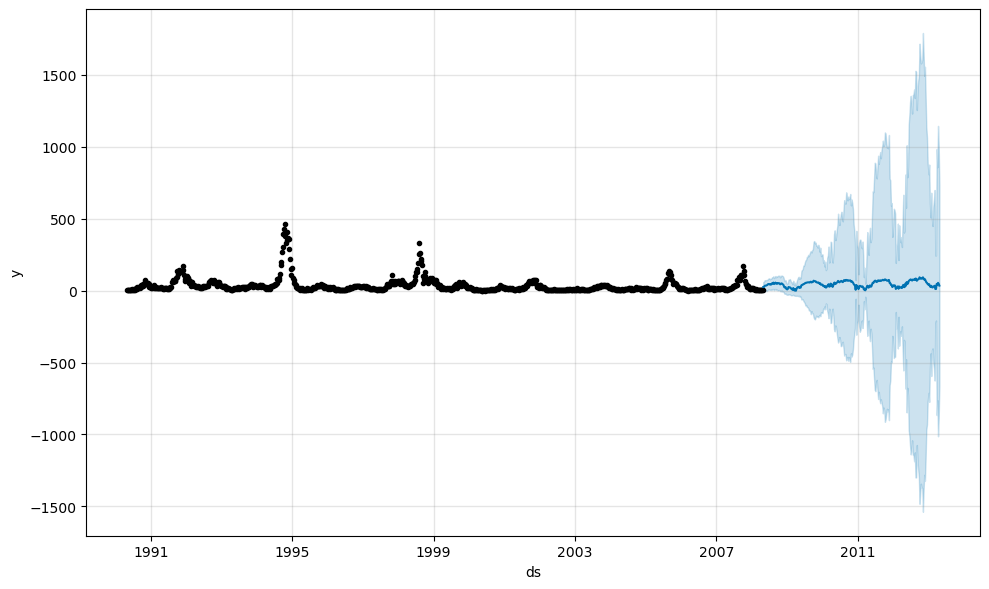

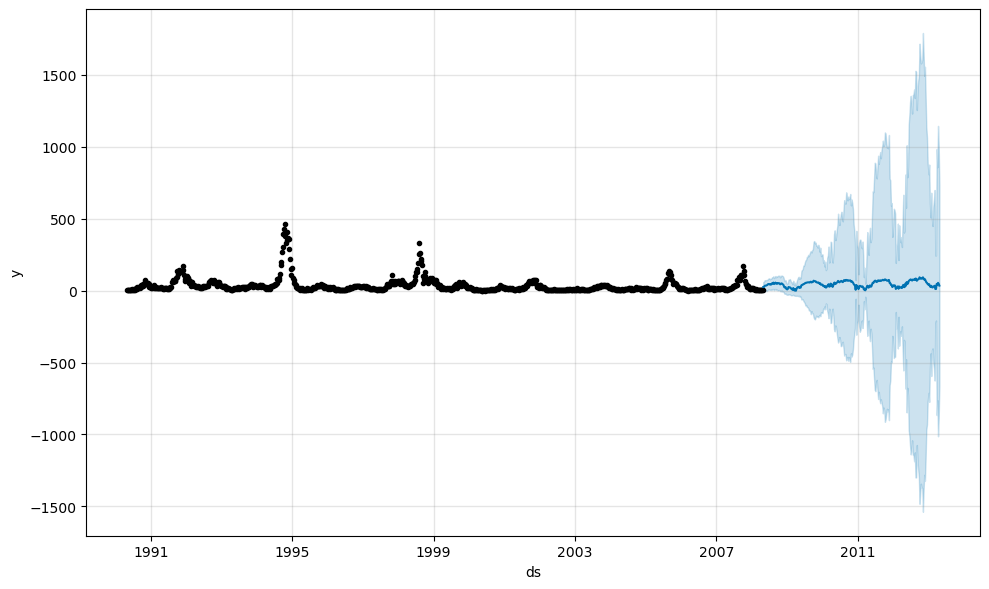

In [34]:
m.plot(forecast_sj)

In [35]:
iq_data = data[data['city'] == 'iq']

In [36]:
iq_data['ndvi_se'] = iq_data['ndvi_se'].fillna(method = 'ffill')
iq_data['ndvi_sw'] = iq_data['ndvi_sw'].fillna(method = 'ffill')
iq_data['ndvi_ne'] = iq_data['ndvi_ne'].fillna(method = 'ffill')
iq_data['ndvi_nw'] = iq_data['ndvi_nw'].fillna(method = 'ffill')

iq_data['reanalysis_air_temp_k'] = iq_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_avg_temp_k'] = iq_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_dew_point_temp_k'] =iq_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_max_air_temp_k'] = iq_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_min_air_temp_k'] = iq_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_specific_humidity_g_per_kg'] = iq_data['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
iq_data['station_min_temp_c'] = iq_data['station_min_temp_c'].fillna(method = 'ffill')


iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [37]:
iq_data = iq_data[['week_start_date','total_cases','avg_reanalysis','avg_ndvi']]

In [38]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [39]:
test_df_iq = test_df_main[test_df_main['city']=='iq']
test_df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


In [40]:
test_df_iq['ndvi_se'] = test_df_iq['ndvi_se'].fillna(method = 'ffill')
test_df_iq['ndvi_sw'] = test_df_iq['ndvi_sw'].fillna(method = 'ffill')
test_df_iq['ndvi_ne'] = test_df_iq['ndvi_ne'].fillna(method = 'ffill')
test_df_iq['ndvi_nw'] = test_df_iq['ndvi_nw'].fillna(method = 'ffill')

test_df_iq['reanalysis_air_temp_k'] = test_df_iq['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_avg_temp_k'] = test_df_iq['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_dew_point_temp_k'] =test_df_iq['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_max_air_temp_k'] = test_df_iq['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_min_air_temp_k'] = test_df_iq['reanalysis_min_air_temp_k'].fillna(method = 'ffill')


test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [41]:
test_df_iq['reanalysis_specific_humidity_g_per_kg'] = test_df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
test_df_iq['station_min_temp_c'] = test_df_iq['station_min_temp_c'].fillna(method = 'ffill')


In [42]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','avg_ndvi']]

In [43]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,avg_ndvi
260,2010-07-02,298.916286,0.175407
261,2010-07-09,298.484000,0.303885
262,2010-07-16,298.447429,0.260786
263,2010-07-23,296.339429,0.089129
264,2010-07-30,298.199143,0.287946


In [44]:
# m_iq = Prophet()
# m_iq.add_regressor('avg_reanalysis')
# m_iq.add_regressor('avg_ndvi')
# m_iq.fit(iq_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast_iq = m_iq.predict(test_df_iq)
# forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [45]:
# forecast_iq.head()

In [46]:
# forecast_iq[forecast_iq['yhat'] == 0].count()

In [47]:

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.add_regressor('avg_reanalysis')
auto_model.add_regressor('avg_ndvi')
auto_model.fit(iq_data)

19:18:44 - cmdstanpy - INFO - Chain [1] start processing
19:18:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:18:55 - cmdstanpy - INFO - Chain [1] start processing
19:18:55 - cmdstanpy - INFO - Chain [1] done processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] start processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing
19:18:56 - cmdstanpy - INFO - Chain [1] done processing
19:18:56 - cmdstanpy - INFO - Chain [1] done pr

19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] done processing
19:19:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] done processing
19:19:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:05 - cmdstanpy - INFO - Chain [1] done processing
19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] start processing
19:19:05 - cmdstanpy - INFO - Chain [1] done processing
19:19:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:05 - cmdstanpy - INFO -

19:19:18 - cmdstanpy - INFO - Chain [1] start processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing
19:19:18 - cmdstanpy - INFO - Chain [1] start processing
19:19:18 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] start processing
19:19:19 - cmdstanpy - INFO - Chain [1] done processing
19:19:19 - cmdstanpy - INFO - Chain [1] 

19:19:51 - cmdstanpy - INFO - Chain [1] start processing
19:19:52 - cmdstanpy - INFO - Chain [1] done processing
19:19:52 - cmdstanpy - INFO - Chain [1] done processing
19:19:53 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
19:19:53 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
19:19:53 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing
19:19:54 - cmdstanpy - INFO - Chain [1] start processing
19:19:54 - cmdstanpy - INFO - Chain [1] start processing
19:19:54 - cmdstanpy - INFO - Chain [1] start processing
19:19:54 - cmdstanpy - INFO - Chain [1] done processing
19:19:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:19:54 - cmdstanpy - INFO - Chain [1] start processin

19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:01 - cmdstanpy - INFO - Chain [1] start processing
19:20:01 - cmdstanpy - INFO - Chain [1] done processing
19:20:02 - cmds

19:20:07 - cmdstanpy - INFO - Chain [1] done processing
19:20:07 - cmdstanpy - INFO - Chain [1] done processing
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] done processing
19:20:08 - cmdstanpy - INFO - Chain [1] done processing
19:20:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] done processing
19:20:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cmdstanpy - INFO - Chain [1] start processing
19:20:08 - cm

19:20:20 - cmdstanpy - INFO - Chain [1] done processing
19:20:20 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] done processing
19:20:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmdstanpy - INFO - Chain [1] start processing
19:20:21 - cmds

19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - INFO - Chain [1] start processing
19:20:26 - cmdstanpy - INFO - Chain [1] done processing
19:20:26 - cmdstanpy - ERROR - Chain [1] error: error during processing

19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmdstanpy - INFO - Chain [1] start processing
19:20:32 - cmdstanpy - INFO - Chain [1] done processing
19:20:32 - cmd

19:21:05 - cmdstanpy - INFO - Chain [1] done processing
19:21:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:05 - cmdstanpy - INFO - Chain [1] start processing
19:21:05 - cmdstanpy - INFO - Chain [1] start processing
19:21:05 - cmdstanpy - INFO - Chain [1] done processing
19:21:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:05 - cmdstanpy - INFO - Chain [1] start processing
19:21:06 - cmdstanpy - INFO - Chain [1] done processing
19:21:06 - cmdstanpy - INFO - Chain [1] start processing
19:21:06 - cmdstanpy - INFO - Chain [1] done processing
19:21:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:06 - cmdstanpy - INFO - Chain [1] start processing
19:21:06 - cmdstanpy - INFO -

19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:19 - cmdstanpy - INFO - Chain [1] start processing
19:21:19 - cmdstanpy - INFO - Chain [1] done processing
19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:21:20 - cmdstanpy - INFO - Chain [1] done processing
19:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:21:20 - cmdstanpy - INFO - Chain [1] start processing
19:21:20 - cmdstanpy - INFO - Chain [1] done processing
19:21:20 - cmdstanpy - ERROR - Chain [1] error: error d

19:21:34 - cmdstanpy - INFO - Chain [1] done processing
19:21:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:21:34 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing
19:21:35 - cmdstanpy - INFO - Chain [1] start processing
19:21:35 - cmdstanpy - INFO - Chain [1] done processing
19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing
19:21:36 - cmdstanpy - INFO - Chain [1] start processing
19:21:36 - cmdstanpy - INFO - Chain [1] done processing
19:21:37 - cmdstanpy - INFO - Chain [1] done processing
19:21:37 - cmdstanpy - INFO - Chain [1] start processing
19:21:37 - cmdstanpy - INFO - Chain [1] done processing
19:21:37 - cmdstanpy - INFO - Chain [1] done processing


19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing
19:22:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing
19:22:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] start processing
19:22:02 - cmdstanpy - INFO - Chain [1] done processing
19:22:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:22:03 - cmdstanpy - INFO -

19:22:13 - cmdstanpy - INFO - Chain [1] start processing
19:22:13 - cmdstanpy - INFO - Chain [1] done processing
19:22:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:22:13 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] start processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing
19:22:14 - cmdstanpy - INFO - Chain [1] done processing
19:22:16 - cm

19:22:34 - cmdstanpy - INFO - Chain [1] start processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing
19:22:34 - cmdstanpy - INFO - Chain [1] start processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing
19:22:34 - cmdstanpy - INFO - Chain [1] done processing
19:22:35 - cmdstanpy - INFO - Chain [1] start processing
19:22:35 - cmdstanpy - INFO - Chain [1] done processing
19:22:36 - cmdstanpy - INFO - Chain [1] start processing
19:22:36 - cmdstanpy - INFO - Chain [1] start processing
19:22:36 - cmdstanpy - INFO - Chain [1] done processing
19:22:36 - cmdstanpy - INFO - Chain [1] start processing
19:22:36 - cmdstanpy - INFO - Chain [1] done processing
19:22:36 - cmdstanpy - INFO - Chain [1] done processing
19:22:38 - cmdstanpy - INFO - Chain [1] start processing
19:22:38 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days whi

19:23:35 - cmdstanpy - INFO - Chain [1] done processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] start processing
19:23:35 - cmdstanpy - INFO - Chain [1] done processing
19:23:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:23:35 - cmdstanpy - INFO - Chain [1] done processing
19:23:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:23:35 - cmdstanpy - INFO - Chain [1] done processing
19:23:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:23:35 - cmdstanpy - INFO -

19:23:49 - cmdstanpy - INFO - Chain [1] start processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:49 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] start processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:50 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] start processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:51 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] done processing
19:23:52 - cmdstanpy - INFO - Chain [1] start processing
19:23:52 - cmdstanpy - INFO - Chain [1] 

19:24:22 - cmdstanpy - INFO - Chain [1] done processing
19:24:22 - cmdstanpy - INFO - Chain [1] done processing
19:24:23 - cmdstanpy - INFO - Chain [1] done processing
19:24:23 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] done processing
19:24:24 - cmdstanpy - INFO - Chain [1] start processing
19:24:24 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] done processing
19:24:25 - cmdstanpy - INFO - Chain [1] start processing
19:24:25 - cmdstanpy - INFO - Chain [1] start processing
19:24:26 - cmdstanpy - INFO - Chain [1] d

19:24:37 - cmdstanpy - INFO - Chain [1] done processing
19:24:38 - cmdstanpy - INFO - Chain [1] done processing
19:24:38 - cmdstanpy - INFO - Chain [1] done processing
19:24:38 - cmdstanpy - INFO - Chain [1] start processing
19:24:38 - cmdstanpy - INFO - Chain [1] done processing
19:24:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:24:38 - cmdstanpy - INFO - Chain [1] start processing
19:24:38 - cmdstanpy - INFO - Chain [1] done processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing
19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing
19:24:39 - cmdstanpy - INFO - Chain [1] done processing
19:24:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:24:39 - cmdstanpy - INFO - Chain [1] start processing
19:24:39 - cmdst

19:24:51 - cmdstanpy - INFO - Chain [1] start processing
19:24:52 - cmdstanpy - INFO - Chain [1] done processing
19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:52 - cmdstanpy - INFO - Chain [1] done processing
19:24:52 - cmdstanpy - INFO - Chain [1] start processing
19:24:52 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:53 - cmdstanpy - INFO - Chain [1] done processing
19:24:53 - cmdstanpy - INFO - Chain [1] start processing
19:24:54 - cmdstanpy - INFO - Chain [1]

19:25:50 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:50 - cmdstanpy - INFO - Chain [1] done processing
19:25:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:25:50 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] start processing
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
19:25:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
Optimization terminated abnormally. Falling back to Newton.
19:25:51 - cmdstanpy - INFO - Chain [1] done processing
19:25:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally

19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:07 - cmdstanpy - INFO - Chain [1] done processing
19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:07 - cmdstanpy - INFO - Chain [1] done processing
19:26:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:26:07 - cmdstanpy - INFO - Chain [1] start processing
19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:08 - cmdstanpy - INFO - Chain [1] done processing
19:26:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:26:08 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing
19:26:09 - cmdstanpy - INFO - Chain [1] start processing
19:26:09 - cmdstanpy - INFO - Chain [1] done processing
19:26:10 - cm

19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing
19:26:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing
19:26:33 - cmdstanpy - INFO - Chain [1] done processing
19:26:34 - cmdstanpy - INFO - Chain [1] start processing
19:26:34 - cmdstanpy - INFO - Chain [1] done processing
19:26:35 - cmdstanpy - INFO - Chain [1] start processing
19:26:35 - cmdstanpy - INFO - Chain [1] done processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing
19:26:36 - cmdstanpy - INFO - Chain [1] start processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing
19:26:36 - cmdstanpy - INFO - Chain [1] start processin

19:27:19 - cmdstanpy - INFO - Chain [1] done processing
19:27:19 - cmdstanpy - INFO - Chain [1] start processing
19:27:19 - cmdstanpy - INFO - Chain [1] done processing
19:27:20 - cmdstanpy - INFO - Chain [1] start processing
19:27:20 - cmdstanpy - INFO - Chain [1] done processing
19:27:20 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] start processing
19:27:21 - cmdstanpy - INFO - Chain [1] done processing
19:27:21 - cmdstanpy - INFO - Chain [1] 

19:27:42 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:43 - cmdstanpy - INFO - Chain [1] start processing
19:27:43 - cmdstanpy - INFO - Chain [1] done processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing
19:27:45 - cmdstanpy - INFO - Chain [1] 

19:28:24 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:24 - cmdstanpy - INFO - Chain [1] start processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing
19:28:24 - cmdstanpy - INFO - Chain [1] done processing
19:28:25 - cmdstanpy - INFO - Chain [1] start processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing
19:28:25 - cmdstanpy - INFO - Chain [1] start processing
19:28:25 - cmdstanpy - INFO - Chain [1] done processing
19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:26 - cmdstanpy - INFO - Chain [1] done processing
19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:26 - cmdstanpy - INFO - Chain [1] start processing
19:28:27 - cmdstanpy - INFO - Chain [1] done processing
19:28:27 - cmdstanpy - INFO - Chain [1] 

19:28:58 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] done processing
19:28:59 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:00 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:00 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] start processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:00 - cmdstanpy - INFO - Chain [1] done processing
19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing
19:29:01 - cmdstanpy - INFO - Chain [1] done processing
19:29:01 - cmdstanpy - INFO - Chain [1] start processing
19:29:01 - cmdstanpy - INFO - Chain [1] d

19:29:18 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] start processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:19 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] start processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:20 - cmdstanpy - INFO - Chain [1] done processing
19:29:21 - cmdstanpy - INFO - Chain [1] 

19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] start processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:09 - cmdstanpy - INFO - Chain [1] done processing
19:30:10 - cmdstanpy - INFO - Chain [1] done processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] start processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:11 - cmdstanpy - INFO - Chain [1] done processing
19:30:12 - cmdstanpy - INFO - Chain [1] done processing
19:30:12 - cmdstanpy - INFO - Chain [1] s

19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] done processing
19:30:27 - cmdstanpy - INFO - Chain [1] start processing
19:30:28 - cmdstanpy - INFO - Chain [1] done processing
19:30:30 - cmdstanpy - INFO - Chain [1] start processing
19:30:30 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
19:30:42 - cmdstanpy - INFO - Chain [1] start processing
19:30:43 - cmdstanpy - INFO - Chain [1] done processing
19:30:44 - cmdstanpy - INFO - Chain [1] start processing
19:30:44 - cmdstanpy - INFO - Chain [1] start processing
19:30:44 - cmdstanpy - INFO - Chain [1] start processing
19:30:44 - cmdstanpy - INFO - Chain [1] start pro

19:31:01 - cmdstanpy - INFO - Chain [1] done processing
19:31:01 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] start processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:02 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:03 - cmdstanpy - INFO - Chain [1] start processing
19:31:03 - cmdstanpy - INFO - Chain [1] done processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1] start processing
19:31:04 - cmdstanpy - INFO - Chain [1]

19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] start processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:39 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:40 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing
19:31:41 - cmdstanpy - INFO - Chain [1] start processing
19:31:41 - cmdstanpy - INFO - Chain [1] d

19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] d

19:32:25 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] start processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:26 - cmdstanpy - INFO - Chain [1] done processing
19:32:27 - cmdstanpy - INFO - Chain [1] start processing
19:32:27 - cmdstanpy - INFO - Chain [1] done processing
19:32:27 - cmdstanpy - INFO - Chain [1] start processing
19:32:28 - cmdstanpy - INFO - Chain [1]

19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:57 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] start processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:58 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] done processing
19:32:59 - cmdstanpy - INFO - Chain [1] start processing
19:32:59 - cmdstanpy - INFO - Chain [1]

19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] done processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:08 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] done processing
19:33:09 - cmdstanpy - INFO - Chain [1] start processing
19:33:09 - cmdstanpy - INFO - Chain [1]

19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] done processing
19:33:26 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] done processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
19:33:27 - cmdstanpy - INFO - Chain [1

19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] done processing
19:33:46 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:47 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] done processing
19:33:48 - cmdstanpy - INFO - Chain [1] start processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:49 - cmdstanpy - INFO - Chain [1] done processing
19:33:52 - cmdstanpy - INFO - Chain [1] s

19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] start processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:29 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] done processing
19:34:30 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] done processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1] start processing
19:34:31 - cmdstanpy - INFO - Chain [1]

19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] start processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:03 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] start processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:04 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] start processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] done processing
19:35:05 - cmdstanpy - INFO - Chain [1] s

19:35:21 - cmdstanpy - INFO - Chain [1] start processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] done processing
19:35:21 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] done processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:22 - cmdstanpy - INFO - Chain [1] start processing
19:35:23 - cmdstanpy - INFO - Chain [1] start processing
19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] done processing
19:35:23 - cmdstanpy - INFO - Chain [1] 

19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:35:59 - cmdstanpy - INFO - Chain [1] done processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing
19:36:00 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing
19:36:00 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] start processing
19:36:01 - cmdstanpy - INFO - Chain [1] done processing
19:36:01 - cmdstanpy - INFO - Chain [1] 

19:36:28 - cmdstanpy - INFO - Chain [1] start processing
19:36:28 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] start processing
19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:29 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] start processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:30 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1]

19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] start processing
19:36:49 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] done processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1] start processing
19:36:50 - cmdstanpy - INFO - Chain [1]

19:37:21 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:22 - cmdstanpy - INFO - Chain [1] start processing
19:37:22 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:23 - cmdstanpy - INFO - Chain [1] done processing
19:37:23 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:24 - cmdstanpy - INFO - Chain [1] done processing
19:37:24 - cmdstanpy - INFO - Chain [1] start processing
19:37:25 - cmdstanpy - INFO - Chain [1] done processing
19:37:25 - cmdstanpy - INFO - Chain [1] 

19:37:59 - cmdstanpy - INFO - Chain [1] start processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:37:59 - cmdstanpy - INFO - Chain [1] done processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:00 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] start processing
19:38:02 - cmdstanpy - INFO - Chain [1] done processing
19:38:02 - cmdstanpy - INFO - Chain [1]

19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] done processing
19:39:26 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] done processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1] start processing
19:39:27 - cmdstanpy - INFO - Chain [1

19:39:55 - cmdstanpy - INFO - Chain [1] start processing
19:39:56 - cmdstanpy - INFO - Chain [1] done processing
19:39:57 - cmdstanpy - INFO - Chain [1] done processing
19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:57 - cmdstanpy - INFO - Chain [1] start processing
19:39:58 - cmdstanpy - INFO - Chain [1] done processing
19:39:59 - cmdstanpy - INFO - Chain [1] start processing
19:40:00 - cmdstanpy - INFO - Chain [1] done processing
19:40:01 - cmdstanpy - INFO - Chain [1] start processing
19:40:02 - cmdstanpy - INFO - Chain [1] done processing
19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
19:40:04 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing
19:40:05 - cmdstanpy - INFO - Chain [1] start processing
19:40:05 - cmdstanpy - INFO - Chain [1] done processing
19:40:06 - cmdstanpy - INFO - Chain [1] start processing
19:40:06 - cmdstanpy - INFO - Chain [1]

19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] done processing
19:40:24 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing
19:40:25 - cmdstanpy - INFO - Chain [1] done processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:25 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1] done processing
19:40:26 - cmdstanpy - INFO - Chain [1] done processing
19:40:26 - cmdstanpy - INFO - Chain [1] done processing
19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:26 - cmdstanpy - INFO - Chain [1] start processing
19:40:27 - cmdstanpy - INFO - Chain [1]

In [48]:
forecast_iq = auto_model.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,4.472339,-8.373678,17.464941
142,2013-03-26,4.653978,-6.903247,18.267883
143,2013-04-02,5.154613,-7.058510,17.803221
144,2013-04-09,4.506469,-8.128523,16.945469
145,2013-04-16,3.493208,-8.383064,15.924718
146,2013-04-23,3.879799,-8.707797,16.085856
147,2013-04-30,3.915421,-7.535995,16.895525
148,2013-05-07,3.276540,-8.747854,15.784006
149,2013-05-14,3.323329,-9.389970,15.244552
150,2013-05-21,2.870755,-8.938568,15.416935


In [49]:
forecast_sj.to_csv('forecast_sj_two_feat_120.csv')
forecast_iq.to_csv('forecast_iq_two_feat_120.csv')

In [14]:
# sj_data.info()